# Calculate ice transport from Rufmod experiments

* **Description**: Reads in and creates ice export timeseries from rufmod experiment
* **Input data**: Rufmod output in timeseries format
* **Output data**: Netcdf with processed ice state for all members
* **Creator**: Alice DuVivier
* **Date**: February 2022

The rufmod experiments were performed where the sea ice roughness over Arctic sea ice regions was set to be equal to what it would be over open ocean. This is to better understand ice-atmosphere coupling, processes, and feedbacks.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob
import dask
from matplotlib.gridspec import GridSpec
import cartopy
import cartopy.crs as ccrs

In [2]:
# list the variables to load
varsneeded = ['sidmasstranx', 'sidmasstrany'] 

var_in_1 = 'sidmasstranx'
var_in_2 = 'sidmasstrany'

# sidmasstranx (for Fram and Barents), sidmasstrany (for Bering)

## Load rufmod experiments

In [3]:
# Load "rufmod" data
#choose cases and data paths
case1 = 'b.e21.BSSP370.f09_g17.rufmod.001'
case2 = 'b.e21.BSSP370.f09_g17.rufmod.002'
case3 = 'b.e21.BSSP370.f09_g17.rufmod.003'
case4 = 'b.e21.BSSP370.f09_g17.rufmod.004'
case5 = 'b.e21.BSSP370.f09_g17.rufmod.005'

# set base directory where all data live
data_dir = '/glade/campaign/cesm/development/pcwg/projects/arctic_cyclones/rufmod_expts/'
# set individual data directories
data_dir1 = data_dir+case1+'/ice/proc/tseries/month_1/'
data_dir2 = data_dir+case2+'/ice/proc/tseries/month_1/'
data_dir3 = data_dir+case3+'/ice/proc/tseries/month_1/'
data_dir4 = data_dir+case4+'/ice/proc/tseries/month_1/'
data_dir5 = data_dir+case5+'/ice/proc/tseries/month_1/'

In [4]:
%%time
#reading in files
ds1 = []
ds2 = []
ds3 = []
ds4 = []
ds5 = []

for var_in in varsneeded:
    print("loading "+var_in)   
    my_files=sorted(glob.glob(data_dir1+case1+'.cice.h.'+var_in+'.*.nc'))
    ds1.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal'))
    my_files=sorted(glob.glob(data_dir2+case2+'.cice.h.'+var_in+'.*.nc'))
    ds2.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal'))
    my_files=sorted(glob.glob(data_dir3+case3+'.cice.h.'+var_in+'.*.nc'))
    ds3.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal'))    
    my_files=sorted(glob.glob(data_dir4+case4+'.cice.h.'+var_in+'.*.nc'))
    ds4.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal'))
    my_files=sorted(glob.glob(data_dir5+case5+'.cice.h.'+var_in+'.*.nc'))
    ds5.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal'))


loading sidmasstranx
loading sidmasstrany
CPU times: user 1.38 s, sys: 81.1 ms, total: 1.46 s
Wall time: 4 s


In [5]:
print("Merging files now")
ds1=xr.merge(ds1,compat='override')
ds2=xr.merge(ds2,compat='override')
ds3=xr.merge(ds3,compat='override')
ds4=xr.merge(ds4,compat='override')
ds5=xr.merge(ds5,compat='override')

Merging files now


In [6]:
futures = xr.concat([ds1,ds2,ds3,ds4,ds5],dim='member_id')

In [7]:
futures.member_id.values

# assign member_id as coordinate array
futures.assign_coords({"member_id": futures.member_id.values})

<xarray.Dataset>
Dimensions:       (nj: 384, ni: 320, member_id: 5, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON          (nj, ni) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    TLAT          (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
    ULON          (nj, ni) float32 321.1 322.2 323.4 324.5 ... nan nan nan nan
    ULAT          (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan
  * time          (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
  * member_id     (member_id) int64 0 1 2 3 4
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/22)
    NCAT          (member_id, time, nc) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    VGRDi         (member_id, time, nkice) float32 dask.array<chunksize=(1, 600, 8), meta=np.ndarray>
    VGRDs         (member_id, time, nksnow) float32 dask.array<chunksize=(1, 600, 3), meta=np.ndarray>
    VGRDb         (member_id, time, nkbio) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    tmask         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    tarea         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    ...            ...
    latt_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    time_bounds   (member_id, time, d2) object dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    sidmasstranx  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    sidmasstrany  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [8]:
ds_all = futures

# assign member_id as coordinate array
ds_all.assign_coords({"member_id": ds_all.member_id.values})

<xarray.Dataset>
Dimensions:       (nj: 384, ni: 320, member_id: 5, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON          (nj, ni) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    TLAT          (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
    ULON          (nj, ni) float32 321.1 322.2 323.4 324.5 ... nan nan nan nan
    ULAT          (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan
  * time          (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
  * member_id     (member_id) int64 0 1 2 3 4
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/22)
    NCAT          (member_id, time, nc) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    VGRDi         (member_id, time, nkice) float32 dask.array<chunksize=(1, 600, 8), meta=np.ndarray>
    VGRDs         (member_id, time, nksnow) float32 dask.array<chunksize=(1, 600, 3), meta=np.ndarray>
    VGRDb         (member_id, time, nkbio) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    tmask         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    tarea         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    ...            ...
    latt_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    time_bounds   (member_id, time, d2) object dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    sidmasstranx  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    sidmasstrany  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [9]:
ds_all

<xarray.Dataset>
Dimensions:       (nj: 384, ni: 320, member_id: 5, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON          (nj, ni) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    TLAT          (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
    ULON          (nj, ni) float32 321.1 322.2 323.4 324.5 ... nan nan nan nan
    ULAT          (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan
  * time          (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni, member_id, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/22)
    NCAT          (member_id, time, nc) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    VGRDi         (member_id, time, nkice) float32 dask.array<chunksize=(1, 600, 8), meta=np.ndarray>
    VGRDs         (member_id, time, nksnow) float32 dask.array<chunksize=(1, 600, 3), meta=np.ndarray>
    VGRDb         (member_id, time, nkbio) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    tmask         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    tarea         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    ...            ...
    latt_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    time_bounds   (member_id, time, d2) object dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    sidmasstranx  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    sidmasstrany  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [10]:
# Shift months by one to be center of time period.
# Take average of the time bounds to get middle of month
# will lose some attributes with time, so may need to put this back in later...
ds_all.time_bounds.load().mean(dim='d2').sel(member_id=0)

<xarray.DataArray 'time_bounds' (time: 1032)>
array([cftime.DatetimeNoLeap(2015, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00

In [11]:
ds_all['time'] = ds_all.time_bounds.load().mean(dim='d2').sel(member_id=0)

In [12]:
ds_all.time

<xarray.DataArray 'time' (time: 1032)>
array([cftime.DatetimeNoLeap(2015, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [13]:
ds_all

<xarray.Dataset>
Dimensions:       (nj: 384, ni: 320, member_id: 5, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON          (nj, ni) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    TLAT          (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
    ULON          (nj, ni) float32 321.1 322.2 323.4 324.5 ... nan nan nan nan
    ULAT          (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan
  * time          (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: nj, ni, member_id, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/22)
    NCAT          (member_id, time, nc) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    VGRDi         (member_id, time, nkice) float32 dask.array<chunksize=(1, 600, 8), meta=np.ndarray>
    VGRDs         (member_id, time, nksnow) float32 dask.array<chunksize=(1, 600, 3), meta=np.ndarray>
    VGRDb         (member_id, time, nkbio) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    tmask         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    tarea         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    ...            ...
    latt_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    time_bounds   (member_id, time, d2) object 2015-01-01 00:00:00 ... 2101-0...
    sidmasstranx  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    sidmasstrany  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [14]:
# set some info for output
longname = 'total snow and sea ice mass transport through gate'
units = ds_all[var_in].units

## Check flux gates where we are going to calculate transport

In [15]:
# Just select one variable, one member, one time 
# to make sure we have correct locations
data_temp1 = ds_all[var_in_1].sel(member_id=0).isel(time=2)
data_temp2 = ds_all[var_in_2].sel(member_id=0).isel(time=2)

In [16]:
data_temp1.load()
data_temp2.load()

<xarray.DataArray 'sidmasstrany' (nj: 384, ni: 320)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [49890.617, 95966.63 , 51947.305, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    TLON     (nj, ni) float32 320.6 321.7 322.8 323.9 325.1 ... nan nan nan nan
    TLAT     (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan nan
    ULON     (nj, ni) float32 321.1 322.2 323.4 324.5 325.6 ... nan nan nan nan
    ULAT     (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan nan
    time     object 2015-03-16 12:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          kg/s
    long_name:      y component of snow and sea ice mass transport
    cell_measures:  area: uarea
    cell_methods:   time: mean
    time_rep:       averaged

### Bering Strait checks

In [17]:
# Indices from Marika: i=198:199, j=331

# Indices we're using
ii_ber_min = 199
ii_ber_max = 201
jj_ber  = 332

# general area
data_npac = data_temp2.loc[jj_ber-10:jj_ber+10,ii_ber_min-10:ii_ber_min+10]
# Just the flux gate
data_ber = data_temp2.loc[jj_ber,ii_ber_min:ii_ber_max]

In [18]:
# Stack into 1D array (400pts)
data_npac_1d = data_npac.stack(horizontal=("nj","ni"))

In [19]:
# Drop nans (243 pts)
data_npac_1d = data_npac_1d.where(abs(data_npac_1d)>=0, drop=True)

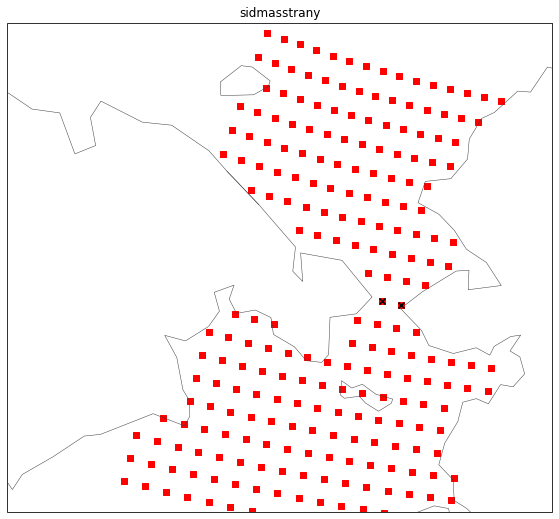

In [20]:
# Want to check that we're plotting the correct area for the training data
# using pcolor here
lon_min = 170
lon_max = 200
lon_avg = 190
lat_min = 60
lat_max = 72

fig = plt.figure(figsize=(12,9))

ax = plt.axes(projection=ccrs.Stereographic(central_longitude=lon_avg))

# Scatter plot where the data exist
cs1 = ax.scatter(    data_npac_1d.coords['TLON'].values,    
                     data_npac_1d.coords['TLAT'].values,
                     c='red', marker='s',
                     transform=ccrs.PlateCarree())

ax.set_extent([lon_min,lon_max,lat_min,lat_max], ccrs.PlateCarree())

ax.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=10)  

ax.set_title(var_in, fontsize=12)

# scatter - add x's over the data for our "gate" points
ax.scatter(          data_ber.coords['TLON'].values,    
                     data_ber.coords['TLAT'].values, 
                     c='black', marker='x',
                     transform=ccrs.PlateCarree())

# show the finished plot
plt.show()

In [21]:
print('Bering values Lats')
print(data_ber['TLAT'].values)
print('Bering values Lons')
print(data_ber['TLON'].values)

Bering values Lats
[65.88094  65.768776]
Bering values Lons
[190.69955 191.91072]


### Fram Strait and Barents Sea checks

In [22]:
# Just look at Fram and Barents gates
# Indices from Marika: Fram i=99, j=370:379; Barents i=99, j=351:365

# fram strait
ii_fram     = 100
jj_fram_min = 369
jj_fram_max = 381

# barents sea
ii_bar      = 85
jj_bar_min  = 345
jj_bar_max  = 367

# general area
data_natl = data_temp1.loc[jj_bar_min-30:jj_fram_min+30,ii_fram-30:ii_fram+30]
# Just the flux gates
data_fram = data_temp1.loc[jj_fram_min:jj_fram_max,ii_fram]
data_bar  = data_temp1.loc[jj_bar_min:jj_bar_max,ii_bar]

In [23]:
# Stack into 1D array (880pts)
data_natl_1d = data_natl.stack(horizontal=("nj","ni"))

In [24]:
# Drop nans (671 pts)
data_natl_1d = data_natl_1d.where(abs(data_natl_1d)>=0, drop=True)

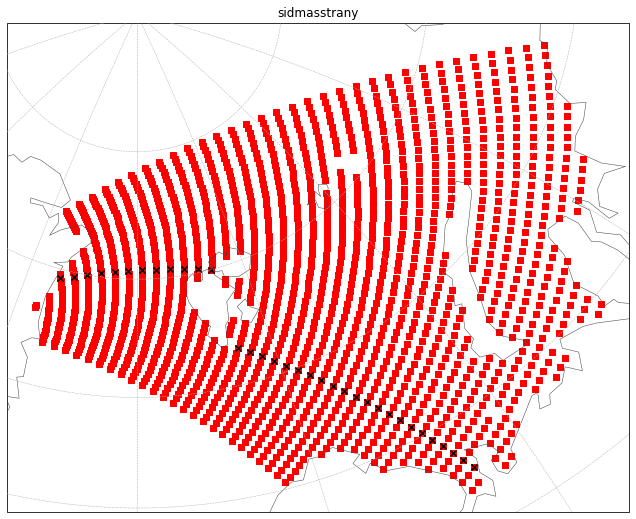

In [25]:
# Want to check that we're plotting the correct area for the training data
lon_avg = 0

fig = plt.figure(figsize=(12,9))

ax = plt.axes(projection=ccrs.Stereographic(central_longitude=lon_avg))

ax.set_title(var_in, fontsize=12)

# Scatter plot where the data exist
ax.scatter(    data_natl_1d.coords['TLON'].values,    
                     data_natl_1d.coords['TLAT'].values,
                     c='red', marker='s',
                     transform=ccrs.PlateCarree())

ax.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=10)  

ax.gridlines(linestyle='--', linewidth=0.5, zorder=11)

# scatter - add x's over the data for our "gate" points
ax.scatter(         data_fram.coords['TLON'].values,    
                     data_fram.coords['TLAT'].values, 
                     c='black', marker='x', transform=ccrs.PlateCarree())

ax.scatter(         data_bar.coords['TLON'].values,    
                     data_bar.coords['TLAT'].values, 
                     c='black', marker='x', transform=ccrs.PlateCarree())

plt.show()

In [26]:
print('Fram values Lats')
print(data_fram['TLAT'].values)
print('Fram values Lons')
print(data_fram['TLON'].values)

Fram values Lats
[79.99461  80.13713  80.245255 80.317955 80.35453  80.3547   80.31858
 80.24671  80.14     79.99971  79.82737  79.62472 ]
Fram values Lons
[ 17.640366   14.4751     11.229635    7.9261312   4.589294    1.2454064
 357.92117   354.64252   351.43356   348.3156    345.30655   342.42056  ]


In [27]:
print('Barents values Lats')
print(data_bar['TLAT'].values)
print('Barents values Lons')
print(data_bar['TLON'].values)

Barents values Lats
[67.70895  68.20153  68.69011  69.17438  69.65399  70.128586 70.59774
 71.06103  71.51796  71.968025 72.41065  72.84522  73.27107  73.68747
 74.093636 74.48872  74.87182  75.24194  75.598045 75.939026 76.26369
 76.570816]
Barents values Lons
[43.40761  42.771652 42.100445 41.391735 40.643124 39.852062 39.01583
 38.131565 37.196224 36.20661  35.159386 34.051052 32.87801  31.636553
 30.322927 28.933376 27.464205 25.911865 24.273056 22.544855 20.72485
 18.81132 ]


### Central Arctic checks

In [28]:
# Just look at New "central Arctic" gate

# central arctic
ii_cen      = 135
jj_cen_min  = 355
jj_cen_max  = 378

# general area
data_natl = data_temp1.loc[jj_cen_min-30:jj_cen_min+30,ii_cen-30:ii_cen+30]
# Just the flux gates
data_cen  = data_temp1.loc[jj_cen_min:jj_cen_max,ii_cen]

In [29]:
# Stack into 1D array (880pts)
data_natl_1d = data_natl.stack(horizontal=("nj","ni"))

In [30]:
# Drop nans (671 pts)
data_natl_1d = data_natl_1d.where(abs(data_natl_1d)>=0, drop=True)

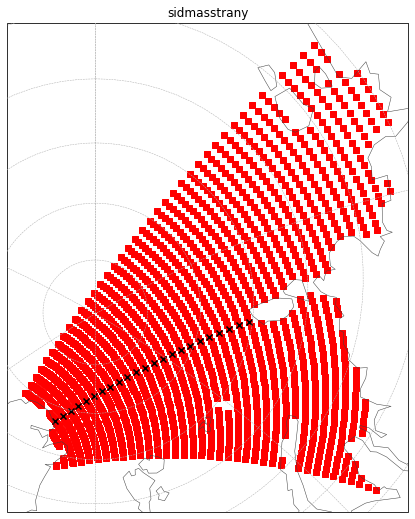

In [31]:
# Want to check that we're plotting the correct area for the training data
lon_avg = 0

fig = plt.figure(figsize=(12,9))

ax = plt.axes(projection=ccrs.Stereographic(central_longitude=lon_avg))

ax.set_title(var_in, fontsize=12)

# Scatter plot where the data exist
ax.scatter(    data_natl_1d.coords['TLON'].values,    
                     data_natl_1d.coords['TLAT'].values,
                     c='red', marker='s',
                     transform=ccrs.PlateCarree())

ax.coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=10)  

ax.gridlines(linestyle='--', linewidth=0.5, zorder=11)

# scatter - add x's over the data for our "gate" points
ax.scatter(         data_cen.coords['TLON'].values,    
                     data_cen.coords['TLAT'].values, 
                     c='black', marker='x', transform=ccrs.PlateCarree())

plt.show()

In [32]:
print('CenArc values Lats')
print(data_cen['TLAT'].values)
print('CenArc values Lons')
print(data_cen['TLON'].values)

CenArc values Lats
[81.189064 81.7314   82.26057  82.77398  83.26837  83.739624 84.18256
 84.59071  84.95618  85.26966  85.52092  85.69974  85.797646 85.809746
 85.73612  85.58185  85.35574  85.06843  84.730644 84.352135 83.94119
 83.50461  83.04784 ]
CenArc values Lons
[ 91.52451    89.53861    87.2746     84.681175   81.69732    78.25184
  74.264626   69.65119    64.333084   58.25693    51.42298    43.91787
  35.935947   27.767683   19.745874   12.17013     5.2485476 359.08075
 353.67615   348.98645   344.93515   341.4378    338.41342  ]


## Calculate fluxes across gates

In [33]:
# fram strait
ii_fram     = 100
jj_fram_min = 369
jj_fram_max = 381

# barents sea
ii_bar      = 85
jj_bar_min  = 345
jj_bar_max  = 367

# central arctic
ii_cen      = 135
jj_cen_min  = 355
jj_cen_max  = 378

# bering sea
ii_ber_min = 199
ii_ber_max = 201
jj_ber  = 332


In [34]:
ds_all

<xarray.Dataset>
Dimensions:       (nj: 384, ni: 320, member_id: 5, time: 1032, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON          (nj, ni) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    TLAT          (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan
    ULON          (nj, ni) float32 321.1 322.2 323.4 324.5 ... nan nan nan nan
    ULAT          (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan
  * time          (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: nj, ni, member_id, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/22)
    NCAT          (member_id, time, nc) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    VGRDi         (member_id, time, nkice) float32 dask.array<chunksize=(1, 600, 8), meta=np.ndarray>
    VGRDs         (member_id, time, nksnow) float32 dask.array<chunksize=(1, 600, 3), meta=np.ndarray>
    VGRDb         (member_id, time, nkbio) float32 dask.array<chunksize=(1, 600, 5), meta=np.ndarray>
    tmask         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    tarea         (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    ...            ...
    latt_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    lonu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    latu_bounds   (member_id, time, nj, ni, nvertices) float32 dask.array<chunksize=(1, 600, 384, 320, 4), meta=np.ndarray>
    time_bounds   (member_id, time, d2) object 2015-01-01 00:00:00 ... 2101-0...
    sidmasstranx  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
    sidmasstrany  (member_id, time, nj, ni) float32 dask.array<chunksize=(1, 600, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BSSP370.f09_g17.rufmod.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 20150201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2021-07-14 at 12:33
    io_flavor:         io_pio

In [35]:
sidmasstranx = ds_all[var_in_1]
sidmasstrany = ds_all[var_in_2]

In [36]:
sidmasstranx

<xarray.DataArray 'sidmasstranx' (member_id: 5, time: 1032, nj: 384, ni: 320)>
dask.array<concatenate, shape=(5, 1032, 384, 320), dtype=float32, chunksize=(1, 600, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 320.6 321.7 322.8 323.9 325.1 ... nan nan nan nan
    TLAT     (nj, ni) float32 -79.22 -79.22 -79.22 -79.22 ... nan nan nan nan
    ULON     (nj, ni) float32 321.1 322.2 323.4 324.5 325.6 ... nan nan nan nan
    ULAT     (nj, ni) float32 -78.95 -78.95 -78.95 -78.95 ... nan nan nan nan
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: member_id, nj, ni
Attributes:
    units:          kg/s
    long_name:      x component of snow and sea ice mass transport
    cell_measures:  area: uarea
    cell_methods:   time: mean
    time_rep:       averaged

In [37]:
# Get data for each of the gates
# We use sidmasstranx for the fram and barents gates and 
# sidmasstrany for the bering gate because of how they line up with the grid

data_fram = sidmasstranx[:,:,jj_fram_min:jj_fram_max,ii_fram]
data_bar  = sidmasstranx[:,:,jj_bar_min:jj_bar_max,ii_bar]
data_cen  = sidmasstranx[:,:,jj_cen_min:jj_cen_max,ii_cen]
data_ber  = sidmasstrany[:,:,jj_ber,ii_ber_min:ii_ber_max]

In [38]:
# now sum up total mass fluxes across the gates
# we have the follow points for each gate: fram(12), barents(16), bering(2)
# final dimensions will be just time x n_ens

data_fram = data_fram.sum(dim='nj')
data_bar  = data_bar.sum(dim='nj')
data_cen  = data_cen.sum(dim='nj')
data_ber  = data_ber.sum(dim='ni')

In [39]:
data_fram.sel(member_id=0).values

array([-1.34212928e+08, -1.03855704e+08, -5.26602160e+07, ...,
        0.00000000e+00,  0.00000000e+00, -2.58666050e+06], dtype=float32)

### Actually load the data now

Before, all the calculations were "lazy" version

In [40]:
%%time
## slow step
data_fram.load()
data_bar.load()
data_cen.load()
data_ber.load()

CPU times: user 29.7 s, sys: 4.95 s, total: 34.7 s
Wall time: 1min


<xarray.DataArray 'sidmasstrany' (member_id: 5, time: 1032)>
array([[  148103.58, 12977154.  , 11594732.  , ...,        0.  ,
               0.  ,        0.  ],
       [  115350.52,  5980133.5 ,  5973914.  , ...,        0.  ,
               0.  ,        0.  ],
       [-1708787.  , 13705257.  , 10694822.  , ...,        0.  ,
               0.  ,        0.  ],
       [-1798062.  , -1212039.2 ,  9556384.  , ...,        0.  ,
               0.  ,        0.  ],
       [ 1071685.8 ,  5427067.  ,  5090543.5 , ...,        0.  ,
               0.  ,        0.  ]], dtype=float32)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: member_id

In [41]:
# assign member_id as coordinate array
data_fram['member_id'] = data_fram.member_id.values
data_bar['member_id'] = data_bar.member_id.values
data_cen['member_id'] = data_cen.member_id.values
data_ber['member_id'] = data_ber.member_id.values

In [42]:
data_fram.coords

Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id  (member_id) int64 0 1 2 3 4

In [43]:
data_fram

<xarray.DataArray 'sidmasstranx' (member_id: 5, time: 1032)>
array([[-1.34212928e+08, -1.03855704e+08, -5.26602160e+07, ...,
         0.00000000e+00,  0.00000000e+00, -2.58666050e+06],
       [-6.20391960e+07, -1.04079840e+08, -9.60495120e+07, ...,
         0.00000000e+00,  0.00000000e+00, -7.17718359e+04],
       [-7.88786720e+07, -9.75217520e+07, -1.33875720e+08, ...,
         0.00000000e+00, -9.64690918e+03, -6.64062400e+06],
       [-1.09814696e+08, -8.14824080e+07, -1.27407912e+08, ...,
         0.00000000e+00,  0.00000000e+00, -4.46941900e+06],
       [-6.22385160e+07, -9.99998640e+07, -9.10412960e+07, ...,
        -4.56263770e+03, -1.95880530e+03, -1.17089650e+06]], dtype=float32)
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id  (member_id) int64 0 1 2 3 4

### Plot just to check

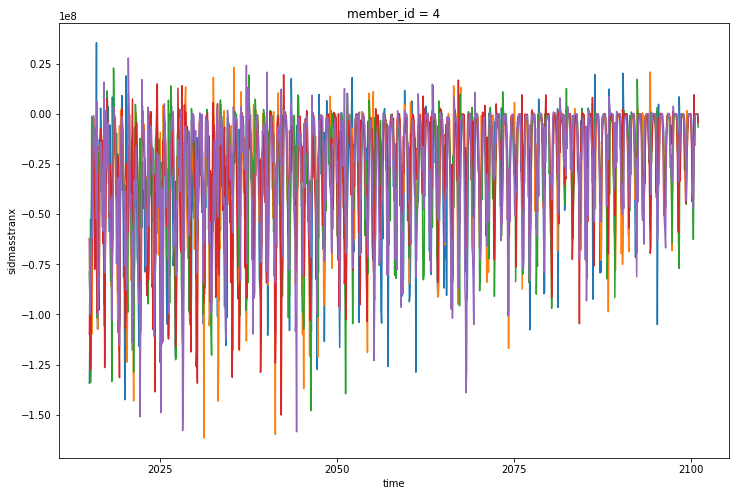

In [44]:
import nc_time_axis
# Setup the figure
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Loop through and plot each member_id all months in 251 years
for member_id in data_fram.member_id.values:
    data_fram.sel(member_id=member_id).plot(ax=ax, label=member_id)

### Save the timeseries

In [45]:
fout = 'rufmod_mass_fluxes'

In [46]:
longname

'total snow and sea ice mass transport through gate'

In [47]:
ds_to_save = xr.Dataset({'flux_fram': (['member_id','time'], data_fram.data),
                         'flux_barents': (['member_id','time'], data_bar.data),
                         'flux_arcoc': (['member_id','time'], data_cen.data),
                         'flux_bering': (['member_id','time'], data_ber.data)},
                        coords={'time':(['time'],data_fram.time.values),
                                'member_id':(['member_id'],data_fram.member_id.values)},
                        attrs={'Author': 'Alice DuVivier', 'units':units, 'longname':longname})

In [48]:
# double check dataset we plan to save
ds_to_save

<xarray.Dataset>
Dimensions:       (member_id: 5, time: 1032)
Coordinates:
  * time          (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id     (member_id) int64 0 1 2 3 4
Data variables:
    flux_fram     (member_id, time) float32 -1.342e+08 -1.039e+08 ... -1.171e+06
    flux_barents  (member_id, time) float32 -3.895e+06 -1.698e+07 ... 0.0 0.0
    flux_arcoc    (member_id, time) float32 -1.246e+08 -6.727e+07 ... -2.786e+06
    flux_bering   (member_id, time) float32 1.481e+05 1.298e+07 ... 0.0 0.0
Attributes:
    Author:    Alice DuVivier
    units:     kg/s
    longname:  total snow and sea ice mass transport through gate

In [49]:
ds_to_save.to_netcdf(fout+'.nc')  # how to save file